## Logistic Regression Exercise

1) Load iris datasets 
2) Using Logistic Regression, classify the outcome (Column : 'Class') based on the labels (Columns :'sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm')
3) Provide some values to predict the outcome
4) Validate the model - print the confusion matrix and the accuracy score

In [25]:
# import everything
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

We are going to use built-in datasets from `sklearn` for this example.


In [26]:
from sklearn import datasets

iris_data = pd.read_csv('iris-data-clean.csv')
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
140,6.7,3.0,5.2,2.3,Virginica
141,6.3,2.5,5.0,1.9,Virginica
142,6.5,3.0,5.2,2.0,Virginica
143,6.2,3.4,5.4,2.3,Virginica
144,5.9,3.0,5.1,1.8,Virginica


In [27]:
df = pd.DataFrame(iris_data, 
                columns=['sepal_length_cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm', 'class'])
df = pd.DataFrame(iris_data)
df.tail

<bound method NDFrame.tail of      sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
140              6.7             3.0              5.2             2.3   
141              6.3             2.5              5.0             1.9   
142              6.5             3.0              5.2             2.0   
143              6.2             3.4              5.4             2.3   
144              5.9             3.0              5.1             1.8   

         class  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       

In [28]:
def myfunction(x):
    if x == "Setosa":
        return 0
    elif x == "Virginica":
        return 1
    else:
        return 2
    
df["class"] = df["class"].apply(myfunction)
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
140,6.7,3.0,5.2,2.3,1
141,6.3,2.5,5.0,1.9,1
142,6.5,3.0,5.2,2.0,1
143,6.2,3.4,5.4,2.3,1
144,5.9,3.0,5.1,1.8,1


In [30]:
# we are going to use the fours features (sepal & petal - length & petal width) 
X = df.iloc[:,0:4]

# use 'class' as the target we're trying to predict
y = df['class']
X.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Visualize the Data

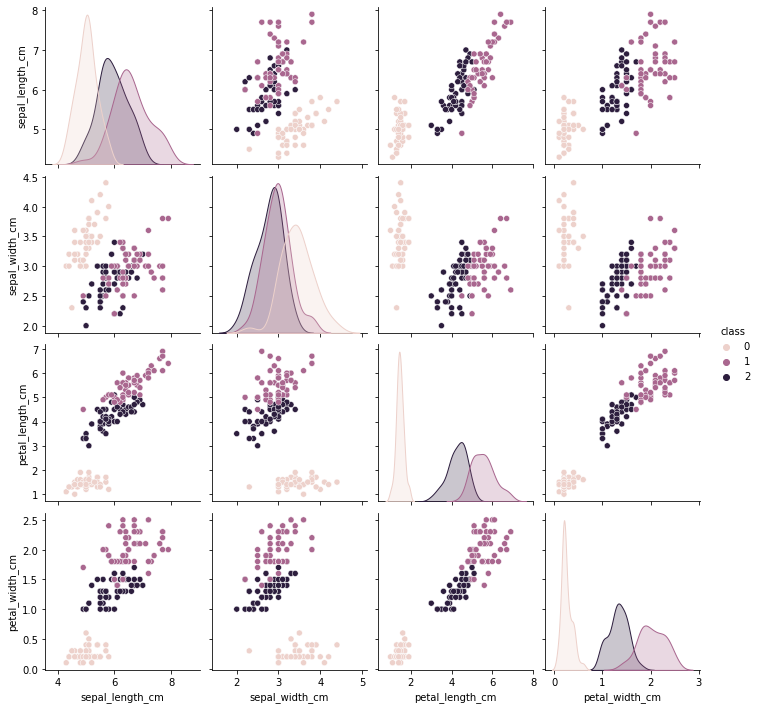

In [31]:
sb.pairplot (df, hue='class')  # Show different levels of a categorical variable by the color of plot elements
plt.show()

### Train our Model

Now, we can do train test split, then use our training set to train our model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [33]:
X_train.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
60,6.7,3.1,4.4,1.4
67,6.3,2.5,4.9,1.5
98,6.3,2.9,5.6,1.8
110,6.4,3.2,5.3,2.3
97,7.1,3.0,5.9,2.1


In [34]:
# we are going to fit our model to the training set

# need to specify multi_class = 'multinomial' and solver
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42)
logReg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [35]:
y_pred = logReg.predict(X_test)

In [36]:
print(y_pred)

[2 1 0 0 0 1 1 1 2 0 0 2 1 1 2 0 1 1 1 2 2 1 0 2 0 2 2 2 1 0 0 0 1 1 0 0 1]


### Model Validation

Like Linear Regression, we want to know how well our model predicts.
Since we are doing classification with Logistics Regression, we want to use 
`accuracy_core()` from `sklearn.metrics`.
A closer result to 1 means better prediction.

In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9459459459459459


In [15]:
# we can use this model to predict any data values
print(logReg.predict([[4.9, 3.5, 1.6, 0.25]]))

[0]


### Experimentation - choosing only two features

In [38]:
# we are going to choose only two features.

X2 = df.iloc[:, 2:4]  # the columns for petal_length and petal_width
y2 = df['class']
X2.head()

,petal_length_cm,petal_width_cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [39]:
df_zero = df.loc[df['class'] == 0]
df_one = df.loc[df['class'] == 1]
df_two = df.loc[df['class'] == 2]
df_zero.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Text(0.5, 0, 'petal length /cm'), Text(0, 0.5, 'petal width /cm')]

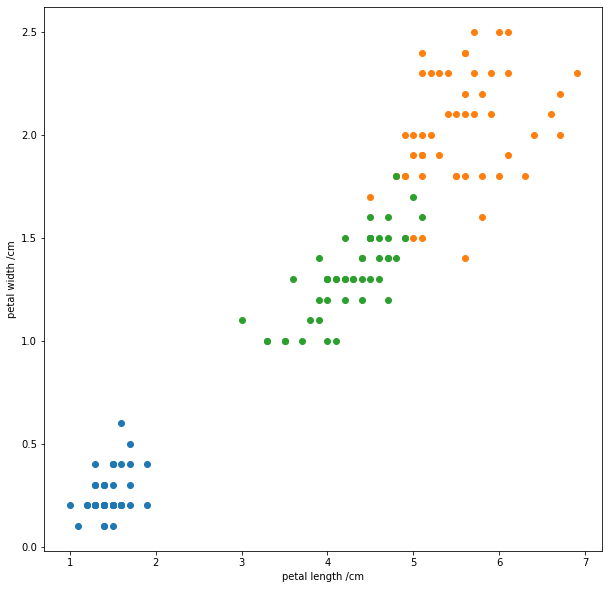

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
# select the columns for petal_length and petal_width
ax.scatter(df_zero.iloc[:, 2:3], df_zero.iloc[:, 3:4])
ax.scatter(df_one.iloc[:, 2:3], df_one.iloc[:, 3:4])
ax.scatter(df_two.iloc[:, 2:3], df_two.iloc[:, 3:4])
ax.set(xlabel = 'petal length /cm', ylabel = 'petal width /cm')

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state = 42)

In [43]:
X2_train.head()

,petal_length_cm,petal_width_cm
60,4.4,1.4
67,4.9,1.5
98,5.6,1.8
110,5.3,2.3
97,5.9,2.1


In [44]:
# initiate a new instance of Logistic Regression Model

logReg2 = LogisticRegression (solver = 'lbfgs', multi_class = 'auto', random_state = 42) # use the same seed for random_state 
logReg2.fit(X2_train, y2_train)

LogisticRegression(random_state=42)

In [45]:
y2_pred = logReg2.predict(X2_test)
print(y2_pred)

[2 1 0 0 0 1 1 1 2 0 0 2 2 1 2 0 1 2 1 2 2 1 0 2 0 2 2 2 1 0 0 0 1 1 0 0 1]


In [23]:
print(y2_test)

69     2
140    1
27     0
19     0
42     0
117    1
126    1
108    1
84     2
18     0
12     0
55     2
128    1
78     2
73     2
36     0
112    1
133    1
100    1
101    1
94     2
136    1
11     0
66     2
31     0
45     2
51     2
76     2
111    1
9      0
4      0
26     0
120    1
125    1
16     0
10     0
118    1
Name: class, dtype: int64


In [46]:
print(accuracy_score(y2_test, y2_pred))

0.8918918918918919


In [ ]:
# how does the accuracy score compared with 4 features?

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0,2])

array([[13,  0,  1],
       [ 0, 13,  0],
       [ 1,  0,  9]], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [0,1])

array([[13,  0],
       [ 0, 13]], dtype=int64)